# **Setup**
 
Reset the Python environment to clear it of any previously loaded variables, functions, or libraries. Then, import the libraries needed to complete the code Professor Melnikov presented in the video. 

In [1]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS
IS.ast_node_interactivity = "all"    # allows multiple outputs from a cell
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np, nltk
from sklearn.feature_extraction.text import CountVectorizer
plt.rcParams['figure.figsize'] = [16, 4]   # plot wider figures
np.set_printoptions(linewidth=10000, precision=3, edgeitems=20, suppress=True)  # format for printed arrays
pd.set_option('max_rows', 10, 'max_columns', 500, 'max_colwidth', 1, 'precision', 2, 'display.width', 3000)

<hr style="border-top: 2px solid #606366; background: transparent;">

# **Review**
 
Below a few famous quotes about language are loaded into a list. While these are all on the same topic, the subtopics vary. Some quotes relate language to knowledge, some to future, some to soul, etc. In other words, some sentences are more similar than others. You can subjectively group sentences by their similarity, but you will learn tools that objectively and quantitatively assign some similarity scores to pairs of sentences. First, you will learn how to convert these quotes to mathematical structures on which you can use vector and matrix operations.
    
<h3 style="color:black"> Creating a Document-Term Matrix </h3>
    
To create a document-term matrix, you'll load 15 famous quotes about language. While these are all on the same topic, subtopics vary: Some quotes relate language to knowledge, some to the future, some to the soul, etc. In other words, some sentences are more similar than others. 

You'll practice converting these quotes into a DTM and then visualizing it.

In [2]:
LsQuote=["A different language is a different vision of life.", # Federico Fellini
  "The limits of my language mean the limits of my world.",     # Ludwig Wittgenstein
  "One language sets you in a corridor for life. Two languages open every door along the way.",  # Frank Smith
  "He who knows no foreign languages knows nothing of his own.",  # Johann Wolfgang von Goethe
  "You can never understand one language until you understand at least two.",  # Geoffrey Willans
  "To have another language is to possess a second soul.",      # Charlemagne
  "Change your language and you change your thoughts.",         # Karl Albrecht
  "Knowledge of languages is the doorway to wisdom.",           # Roger Bacon
  "Language is the blood of the soul into which thoughts run and out of which they grow.",  # Oliver Wendell Holmes
  "Learn a new language and get a new soul.",                   # Czech Proverb
  "A special kind of beauty exists which is born in language, of language, and for language.",  # Gaston Bachelard
  "Learning is a treasure that will follow its owner everywhere.",  # Chinese Proverb
  "One should not aim at being possible to understand but at being impossible to misunderstand.",  # Marcus Fabius Quintilian
  "A mistake is to commit a misunderstanding.",                  # Bob Dylan
  "Language is to the mind more than light is to the eye."]     # William Gibson

print('Number of quotes:', len(LsQuote))

Number of quotes: 15


<span style="color:black">You can use `scikit-learn`'s [`CountVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object to build a document term matrix ([DTM](https://en.wikipedia.org/wiki/Document-term_matrix)). `CountVectorizer` takes a list of string sentences, parses them into word tokens, builds a vocabulary from the list of unique words in the corpus of sentences, and counts each word in each sentence. The vocabulary words become columns and sentences (or documents) become rows. In addition, this object has many useful arguments and methods for convenient preprocessing, such as stopword removal, lower casing, etc. It can also be customized with a more sophisticated preprocessing tool, such as a lemmatizer. The default word tokenizer pattern is the argument `token_pattern='(?u)\b\w\w+\b'`, which assumes words are made up of multiple word characters, but can be modified for other word separators.

<span style="color:black">Use the `CountVectorizer` object with a common English list of [stopwords](https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words) and lower-case preprocessor.

In [3]:
cv = CountVectorizer(stop_words='english', lowercase=True) # create object to count pre-processed words
cv

CountVectorizer(stop_words='english')

Now that the object is initialized, you can pass the list of sentence strings to the `fit_transform()` method. Nearly all modeling objects in `scikit-learn` have `fit`, `transform`, and `fit_transform` methods. Here, `fit` applies preprocessing, parses words, and learns the vocabulary. Once the vocabulary is learned on a set of documents, you can apply the same set of docs or another set of docs to be transformed to a DTM. Note that the `CountVectorizer` only "knows" the vocabulary it was fitted on. So, if the transformed set of documents has new words, they will be ignored. For this reason, you should try to have a reasonably comprehensive vocabulary when you apply `CountVectorizer`. Otherwise, you'll need to refit the `CountVectorizer` object as you add documents. 

<span style="color:black">The `fit_transform` applies both methods at once to the same set of documents (or quotes, in this case). 

<span style="color:black">A transformation returns a SciPy sparse matrix, which stores indices and values of non-zero elements in a matrix. If the matrix is highly sparse (as is often the case with DTMs), then such data structure is very effective in saving memory. It is interesting that a larger vocabulary will not use any more memory for storing counts in a sparse matrix but will use some memory to store a larger vocabulary list itself.

In [4]:
DT_smatrix = cv.fit_transform(LsQuote)     # create document-term matrix (DTM) in sparse format
DT_smatrix

<15x48 sparse matrix of type '<class 'numpy.longlong'>'
	with 64 stored elements in Compressed Sparse Row format>

<span style="color:black">Note that the DTM above has the size of 15 rows (of sentences) and 48 columns (of words). That's 720 values with only 64 non-zero values, or 0.88%. In NLP we call the fraction of non-zero elements the **sparsity degree**.


## Retrieve a Vocabulary From a DTM and Convert It to a DataFrame

<span style="color:black"> You can retrieve a vocabulary from `DT_smatrix` with the `get_feature_names()` method.

In [5]:
LsVocab = cv.get_feature_names()          # create a vocabulary of unique words in our corpus
print(LsVocab)

['aim', 'beauty', 'blood', 'born', 'change', 'commit', 'corridor', 'different', 'door', 'doorway', 'exists', 'eye', 'follow', 'foreign', 'grow', 'impossible', 'kind', 'knowledge', 'knows', 'language', 'languages', 'learn', 'learning', 'life', 'light', 'limits', 'mean', 'mind', 'mistake', 'misunderstand', 'misunderstanding', 'new', 'open', 'owner', 'possess', 'possible', 'run', 'second', 'sets', 'soul', 'special', 'thoughts', 'treasure', 'understand', 'vision', 'way', 'wisdom', 'world']


<span style="color:black">Note that the vocabulary is a list of strings, and its order corresponds to the columns in the DTM. You can use this list to label columns of a DataFrame if you decide to convert the sparse array to a DataFrame.

<span style="color:black"> The sparse matrix can be converted to a NumPy array with `toarray()` method.

In [6]:
DT_smatrix.toarray()[0:5,0:20]

array([[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

<span style="color:black">Within this slice of a few rows and columns from the matrix, you can see a lot of zeros.

Now, wrap the array as a DataFrame with sentences as row indices and vocabulary words as column indices.

In [7]:
dfDT = pd.DataFrame(DT_smatrix.toarray(), index=LsQuote, columns=LsVocab)
dfDT.iloc[0:5,0:10]   # print just a few rows and columns

,aim,beauty,blood,born,change,commit,corridor,different,door,doorway
A different language is a different vision of life.,0,0,0,0,0,0,0,2,0,0
The limits of my language mean the limits of my world.,0,0,0,0,0,0,0,0,0,0
One language sets you in a corridor for life. Two languages open every door along the way.,0,0,0,0,0,0,1,0,1,0
He who knows no foreign languages knows nothing of his own.,0,0,0,0,0,0,0,0,0,0
You can never understand one language until you understand at least two.,0,0,0,0,0,0,0,0,0,0


   
## Visualize the DTM

<span style="color:black">Sometimes the DataFrame is small enough to be visualized. Use the Seaborn library to add colors to values to the DTM of these sentences, which helps identify the distribution of words around sentences. 

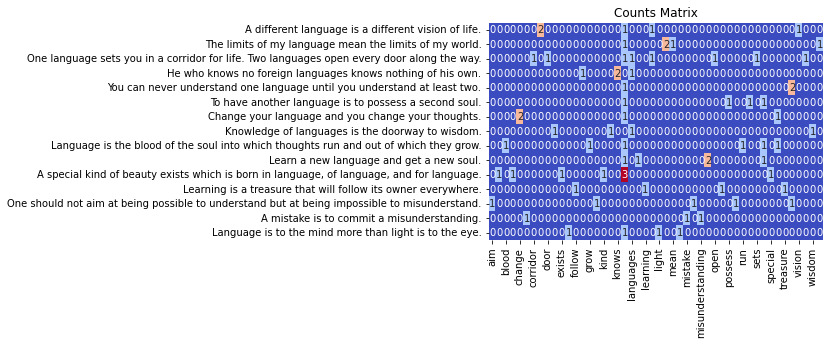

In [8]:
ax = sns.heatmap(dfDT, annot=True, cmap='coolwarm', cbar=False);
tmp = ax.set_title('Counts Matrix');

Take a look at this matrix and make sure you understand what it is showing you. What is each row, and what is each column? Do you notice the most frequent words? What about words that are repeated multiple times in a single sentence?

<hr style="border-top: 2px solid #606366; background: transparent;">

# Optional Practice

Now you will evaluate the DTM above and  build your own on a larger corpus.

As you work through these tasks, check your answers by running your code in the *#check solution here* cell, to see if you’ve gotten the correct result. If you get stuck on a task, click the See **solution** drop-down to view the answer.


## Part 1: Exploring Sentence Vectors in DTM

### Task 1

`'language'` and `'soul'` are words within LsQuote. Convert a column for `'language'` to a vector `X` (as 1D NumPy array) and a column for `'soul'` to a vector `Y`. Then compute dot product, $X\bullet Y$, between these vectors.

You will learn later that a dot product represents a measure of similarity between two vectors. Thus, a higher dot product implies greater similarity.

<b>Hint:</b> You can use <code>dfDT.language</code> to access the column by its name. 

In [9]:
X = dfDT.language.values
Y = dfDT.soul.values
print('X:', X)
print('Y:', Y)
X @ Y

X: [1 1 1 0 1 1 1 0 1 1 3 0 0 0 1]
Y: [0 0 0 0 0 1 0 0 1 1 0 0 0 0 0]


3


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
X = dfDT.language.values
Y = dfDT.soul.values
print('X:', X)
print('Y:', Y)
X @ Y
    </pre>
    </details> 
</font>
<hr>

### Task 2

Use the following steps to compute the dot product between vector representations of the two longest sentences, where length is the count of words listed in the DTM vocabulary for the given sentence:

1. Sum the values of each row in `dfDT`, returning the index/label/sentence and number of words in the DTM.
2. Sort these values from smallest to largest.
3. Retrieve the two largest indexes by DTM sum count (you do not need to store the actual values anymore).
4. Put these two indexes/sentences/labels in a list named `LsIX`.
5. Subset `dfDT` using `.loc` to retrieve the DTM array values of just those two sentences.
6. Use dot product to calculate the "distance" between the DTM array values of those two sentences.

<b>Hint:</b> Use Pandas DataFrame's <code>sum()</code> to count words in each sentence, i.e., to sum frequencies in each row of the DTM <code>dfDT</code>. The length here is measured in terms of words in DTM vocabulary only. Then use <code>sort_values()</code> to sort sentence lengths and retrieve top two (i.e., longest) sentences. Save as a list of strings to a variable <code>LsIx</code>. Retrieve the row vectors for the sentences in <code>LsIx</code> and compute their dot product. Once the rows are sorted, you can use slice or <code>head()</code> or <code>tail()</code> to display top or bottom rows.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
sumwords = np.sum(dfDT, axis=1)
sortsums = sumwords.sort_values()
twolongestindex = sortsums[-2:].index
LsIX = list(twolongestindex)
LsIX
X, Y = dfDT.loc[LsIX,:].values
print('X:', X)
print('Y:', Y)
X@Y
    </pre>
When computing a dot product between arrays, your result is a similarity metric of the words in common between the two sentences:
howRelatedAreTwoSentencesBasedOnCommonVocab = wordInVocab1stSentence @ wordInVocab2ndSentence
    </details> 
</font>
<hr>

### Task 3

Find all sentence pairs with the largest dot product of their sentence vectors. Because greater dot product means greater similarity, this finds the most similar sentence pairs (based on common words).

There are many ways to implement this. One approach is a double loop over rows of `dfDT`.

<b>Hint:</b> You can try a double loop over rows of <code>dfDT</code>. To retrieve a row by its index, try <code>dfDT.iloc[i,:]</code>.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
LTMem = []
nMaxDP = 0
for i in range(len(dfDT)):
    for j in range(i+1, len(dfDT)):            # avoid duplicated and identical pairs
        nDP = dfDT.iloc[i,:] @ dfDT.iloc[j,:]  # dot product of two sentences
        LTMem += [(nDP, i, j)]                 # save dot product and related row indices
        
LTMem = sorted(LTMem, reverse=True)            # automatically sorts by the first element of the tuple element
nMaxDP = LTMem[0][0]                           # largest dot product value
for nDP, i, j in LTMem:                        # find and print all sentence pairs with largest DP
    if nDP == nMaxDP:
        print(f'DP={nDP}:\n', LsQuote[i], '\n', LsQuote[j])
    </pre>
    </details> 
</font>
<hr>

### Task 4


Here, you'll try a linear algebra approach to the problem you completed in Task 3. 

1. Use the [`values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html) attribute to save the underlying array of values of `dfDT` to a 2D array $X$.
1. Compute the matrix inner product (or dot product of all of its pairs of row vectors), $X\bullet X'$ of size $15\times 15$, and save to `aDP`, where $X'$ is the transpose of $X$.
    1. The diagonal elements of this matrix are dot products of sentence vectors with themselves. 
    1. Also this matrix is symmetric with duplicated dot products above and below diagonal.
1. Use [`np.triu()`](https://numpy.org/doc/stable/reference/generated/numpy.triu.html) to keep only the upper triangular values from `aDP`. Use parameter `k` to exclude the diagonal. See docs. The end result is also a $15\times15$ matrix `aUpTri`, which contains dot products for unique pairs of sentences.
1. Create a `aBoolMask` matrix of Boolean values indicating where the max dot product values are in the upper triangular matrix `aUpTri`. This is just a `==` between the matrix and the max value of `aUpTri`. The comparison is applied element-wise, returning a $15\times15$ matrix of Booleans.
    1. Use the `max()` method of a NumPy array to find the max value in `aUpTri`.
1. Use [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) method to retrieve row and column indices of largest DP values from the matrix `aBoolMask`.
2. Finally, iterate over corresponding pairs of indices and print the dot product value from `aUpTri` and the corresponding quotes.

Make sure to carefully study and verify all intermediate structures and their values.

FYI: This method computes redundant dot products in the lower triangular and on the diagonal (you discard these) but may still be faster since NumPy computes all operations in C/C++ level (closer to hardware) without the overhead of a high-level programming interface.

<b>Hint:</b> Review matrix operations in a previous notebook.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
X = dfDT.values
aDP = X @ X.T
aUpTri = np.triu(aDP, k=1)
aBoolMask = aUpTri == aUpTri.max()
I, J = np.where(aBoolMask)   # alt: aBoolMask.nonzero()
for i, j in zip(*(I, J)):
    print(f'DP={aUpTri[i,j]}:\n', LsQuote[i], '\n', LsQuote[j])
    </pre>
    </details> 
</font>
<hr>

<hr style="border-top: 2px solid #606366; background: transparent;">

## Part 2: Building a DTM

### Task 5

Here, you will work on *Alice in Wonderland* (i.e., *'carroll-alice.txt'* file id) from NLTK's Gutenberg Corpus. 

1. Download tokenized sentences of words (list of lists of word strings) into `LLsWords`.
1. Then build a list of sentence strings, `LsSents` (it will be needed in tasks below).
1. From `LLsWords` remove any words that are not entirely alphabetic or are only one character long. Lowercase all remaining words. (Hint: You might need a double loop over a list of lists.)
1. Build a count vectorizer object `cv1` with `analyzer=lambda x: x`, which avoids parsing strings and instead accepts sentences as lists of words.
1. Fit and transform the `LLsWords`.
1. Create a DataFrame `dfAlice` from the resulting DTM matrix.

<b>Hint:</b> You may need <code>nltk.corpus.gutenberg.sents('carroll-alice.txt')</code> to draw sentences as lists of lists of words. See code above to build a DTM sparse matrix, then NumPy array, then a DataFrame. The index labels are not necessary but nice to have. The resulting DTM is of size 1703 rows × 2557 columns.

In [ ]:
# check solution here

<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
_ = nltk.download(['gutenberg'], quiet=True)   # download Gutenberg corpus
LLsWords = nltk.corpus.gutenberg.sents('carroll-alice.txt') # list of lists of words (i.e. sentences of words)
LsSents = [' '.join(LsWords) for LsWords in LLsWords]  # list of sentences
LLsWords = [[w.lower() for w in LsWords if w.isalpha() and len(w)>1] for LsWords in LLsWords]

cv1 = CountVectorizer(analyzer=lambda x: x)
smX = cv1.fit_transform(LLsWords)  # sparse matrix
X = smX.toarray()                  # DTM matrix as a 2D NumPy array
dfAlice = pd.DataFrame(X, columns=cv1.get_feature_names())
dfAlice
    </pre>
    </details> 
</font>
<hr>

### Task 6

Compute the sparsity degree (i.e., fraction of non-zero elements) in `dfAlice`.

<b>Hint:</b> You can use logical comparison of an array to a zero value to return a matrix of Boolean values with non-zero positions indicated. Then use a <code>sum()</code> to count non-zeros.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
nNonZeroCount = smX.nnz        # alt: sum(sum(X > 0))
nNonZeroCount / (X.shape[0] * X.shape[1])
    </pre>
    </details> 
</font>
<hr>

### Task 7

Find two sentences with the largest dot product of their sentence vectors in `dfAlice`.

<b>Hint:</b> You can reuse your code from the task above. This is just a larger-scale implementation. The largest dot product is 511.


In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
X = dfAlice.values
aDP = X @ X.T
aUpTri = np.triu(aDP, k=1)
aBoolMask = aUpTri == aUpTri.max()
I, J = np.where(aBoolMask)   # alt: aBoolMask.nonzero()
for i, j in zip(*(I, J)):
    s1, s2 = LsSents[i], LsSents[j]
    print(f'DP={aUpTri[i,j]}:\n', s1, '\n', s2)
    </pre>
    </details> 
</font>
<hr>

### Task 8

For the two sentences with the largest dot product you found in the previous task, find the word that most increased the dot product.

<b>Hint:</b> You can first tokenize and convert each sentence to a set of words. Then, find common words with a set intersection. Then, for each common word, compute its frequency in each sentence and multiply these frequencies. The largest product is the largest contribution to dot product.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
SsCommon = set(s1.split()) & set(s2.split())
# The answer is at the top of the sorted list:
sorted([(s1.count(w) * s2.count(w), w, s1.count(w), s2.count(w)) for w in SsCommon], reverse=True)
    </pre>
    </details> 
</font>
<hr>